
<h1> DS200A Computer Vision Assignment</h1>

In [735]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import skimage
from skimage import data
from skimage import io
from skimage.io import imread_collection
import cv2
import seaborn as sns
import scipy.stats as sc
import os
from skimage import img_as_ubyte
from skimage import feature
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.cluster import KMeans
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
import mahotas
import joblib

<h2>  Part Three: Classifier training and performance assessment. </h2>	

In [172]:
label_list = next(os.walk('20_categories_training/20_categories_training'))[1]
label_list.sort()
label_dict = {}
for i in range(20):
    label_dict[i] = label_list[i]
labels = list(label_dict.values())
label_dict

{0: 'airplanes',
 1: 'bear',
 2: 'blimp',
 3: 'comet',
 4: 'crab',
 5: 'dog',
 6: 'dolphin',
 7: 'giraffe',
 8: 'goat',
 9: 'gorilla',
 10: 'kangaroo',
 11: 'killer-whale',
 12: 'leopards',
 13: 'llama',
 14: 'penguin',
 15: 'porcupine',
 16: 'teddy-bear',
 17: 'triceratops',
 18: 'unicorn',
 19: 'zebra'}

In [21]:
def train_test_split(df, ratio, rand_state = 1234):
    train=df.sample(frac = ratio, random_state = rand_state)
    test=df.drop(train.index)
    return train, test
#Split the data into a training set, and test set 
def accuracy_calc(pred, actual):
    return 0
# Calculate the accuracy percentage of the predicted values

## Reading Train Data

In [419]:
final_data = pd.read_csv('training_data.csv', index_col=0)
final_data2 = pd.read_csv('new_training_data.csv', index_col=0)
train, test = train_test_split(final_data2, ratio = 0.8)
test.shape

(300, 50)

In [409]:
test.columns

Index(['Encoding', 'image_size', 'red_ch_intensity', 'green_ch_intensity',
       'blue_ch_intensity', 'gray_intensity', 'aspect_ratio', 'red_ch_std',
       'green_ch_std', 'blue_ch_std', 'gray_std', 'red_ch_skew',
       'green_ch_skew', 'blue_ch_skew', 'gray_skew', 'red_ch_kurt',
       'green_ch_kurt', 'blue_ch_kurt', 'gray_kurt', 'low_contrast', 'harris',
       'dog', 'avg_y', 'avg_cb', 'avg_cr', 'std_y', 'std_cb', 'std_cr',
       'avg_hog', 'std_hog', 'bag_of_words_01', 'bag_of_words_02',
       'bag_of_words_03', 'bag_of_words_04', 'bag_of_words_05',
       'bag_of_words_06', 'bag_of_words_07', 'bag_of_words_08',
       'bag_of_words_09', 'bag_of_words_10', 'bag_of_words_11',
       'bag_of_words_12', 'bag_of_words_13', 'bag_of_words_14',
       'bag_of_words_15', 'bag_of_words_16', 'bag_of_words_17',
       'bag_of_words_18', 'bag_of_words_19', 'bag_of_words_20'],
      dtype='object')

<h3>  Train models using all of the following methods below. Be sure to drop the actual image column, and the encoding</h3>	Take note of the differences in accuracy, and methods.


## Feature Engineering

In [658]:
#train_cols = list(train.columns.values[20:]) #+ ['red_ch_intensity']
train_cols = ['red_ch_intensity', 'green_ch_intensity',
       'blue_ch_intensity', 'gray_intensity', 'aspect_ratio', 'red_ch_std',
       'green_ch_std', 'blue_ch_std', 'gray_std', 'red_ch_skew',
       'blue_ch_skew', 'gray_skew', 'red_ch_kurt',
       'green_ch_kurt', 'blue_ch_kurt', 'gray_kurt']
train_cols = train_cols + [f'bag_of_words_0{i}' for i in range(1, 10)] + [f'bag_of_words_1{i}' for i in range(10)] + ['bag_of_words_20']
train_cols


['red_ch_intensity',
 'green_ch_intensity',
 'blue_ch_intensity',
 'gray_intensity',
 'aspect_ratio',
 'red_ch_std',
 'green_ch_std',
 'blue_ch_std',
 'gray_std',
 'red_ch_skew',
 'blue_ch_skew',
 'gray_skew',
 'red_ch_kurt',
 'green_ch_kurt',
 'blue_ch_kurt',
 'gray_kurt',
 'bag_of_words_01',
 'bag_of_words_02',
 'bag_of_words_03',
 'bag_of_words_04',
 'bag_of_words_05',
 'bag_of_words_06',
 'bag_of_words_07',
 'bag_of_words_08',
 'bag_of_words_09',
 'bag_of_words_10',
 'bag_of_words_11',
 'bag_of_words_12',
 'bag_of_words_13',
 'bag_of_words_14',
 'bag_of_words_15',
 'bag_of_words_16',
 'bag_of_words_17',
 'bag_of_words_18',
 'bag_of_words_19',
 'bag_of_words_20']

In [594]:
new_train_cols = ['red_ch_intensity', 'green_ch_intensity',
       'blue_ch_intensity', 'gray_intensity', 'aspect_ratio', 'red_ch_std',
       'green_ch_std', 'blue_ch_std', 'gray_std', 'red_ch_skew',
       'blue_ch_skew', 'gray_skew', 'red_ch_kurt',
       'green_ch_kurt', 'blue_ch_kurt', 'gray_kurt', 'harris',
       'avg_cb', 'avg_cr', 'std_y','std_cr',
       'avg_hog', 'std_hog']
new_train_cols = new_train_cols + [f'bag_of_words_0{i}' for i in range(1, 10)] + [f'bag_of_words_1{i}' for i in range(10)] + ['bag_of_words_20']
new_train_cols

['red_ch_intensity',
 'green_ch_intensity',
 'blue_ch_intensity',
 'gray_intensity',
 'aspect_ratio',
 'red_ch_std',
 'green_ch_std',
 'blue_ch_std',
 'gray_std',
 'red_ch_skew',
 'blue_ch_skew',
 'gray_skew',
 'red_ch_kurt',
 'green_ch_kurt',
 'blue_ch_kurt',
 'gray_kurt',
 'harris',
 'avg_cb',
 'avg_cr',
 'std_y',
 'std_cr',
 'avg_hog',
 'std_hog',
 'bag_of_words_01',
 'bag_of_words_02',
 'bag_of_words_03',
 'bag_of_words_04',
 'bag_of_words_05',
 'bag_of_words_06',
 'bag_of_words_07',
 'bag_of_words_08',
 'bag_of_words_09',
 'bag_of_words_10',
 'bag_of_words_11',
 'bag_of_words_12',
 'bag_of_words_13',
 'bag_of_words_14',
 'bag_of_words_15',
 'bag_of_words_16',
 'bag_of_words_17',
 'bag_of_words_18',
 'bag_of_words_19',
 'bag_of_words_20']

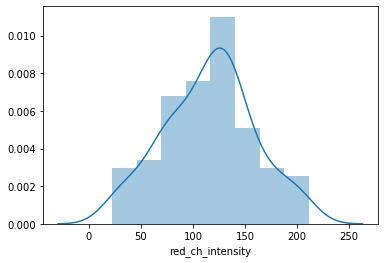

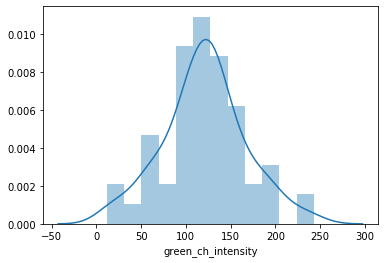

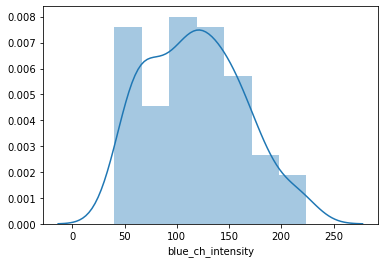

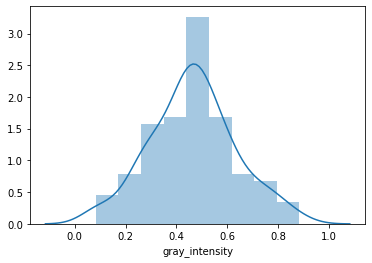

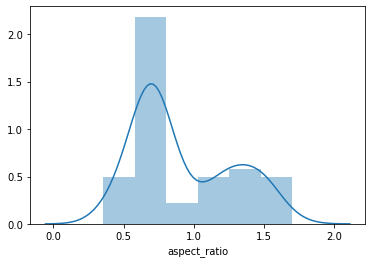

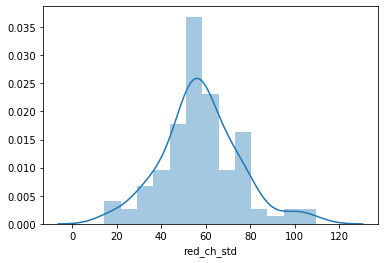

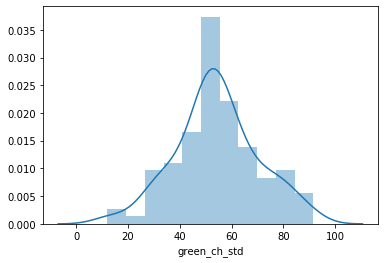

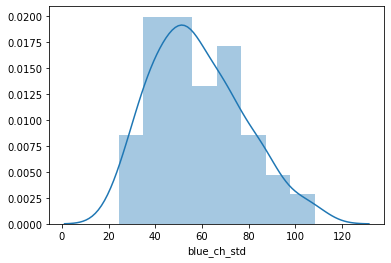

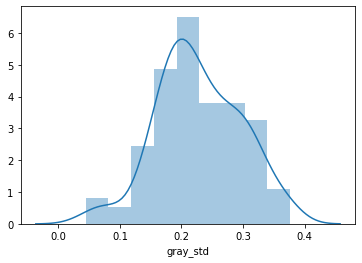

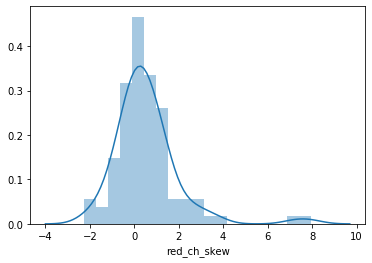

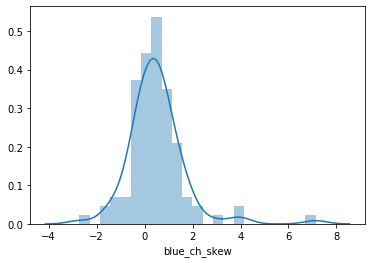

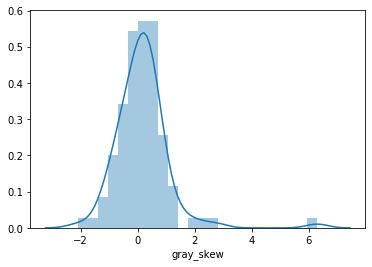

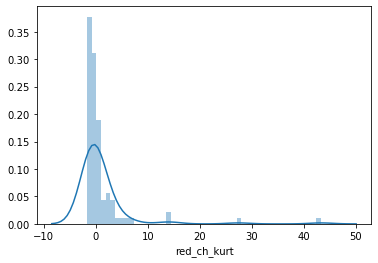

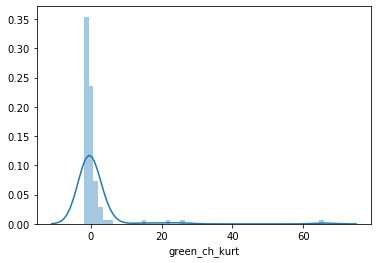

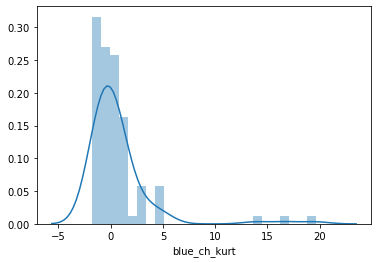

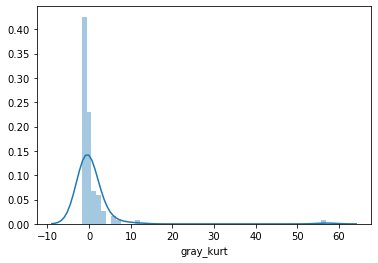

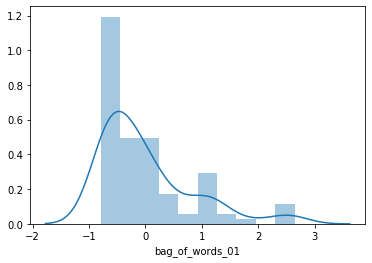

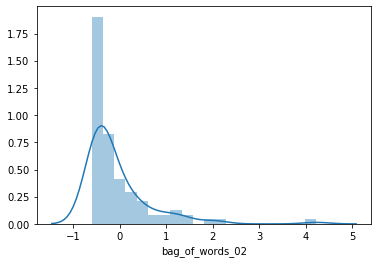

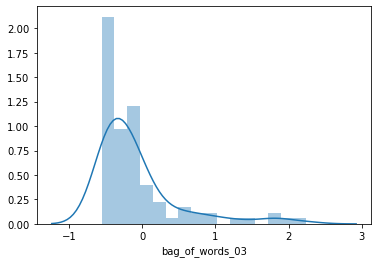

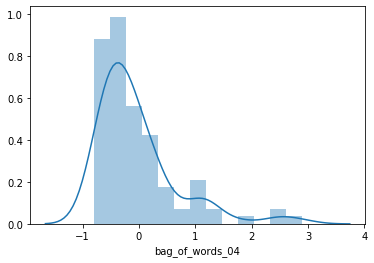

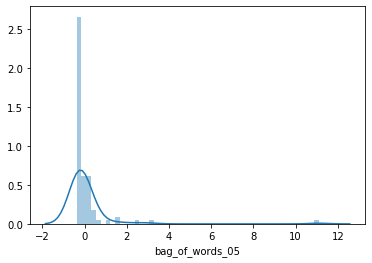

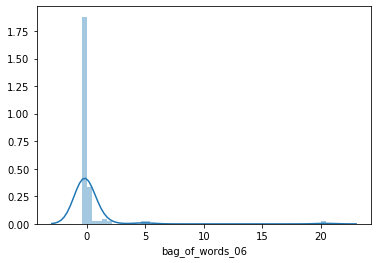

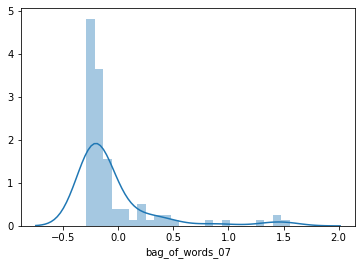

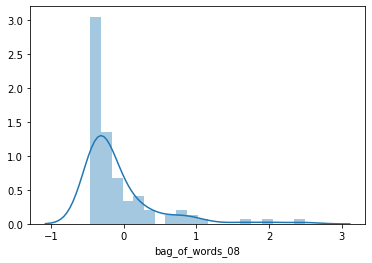

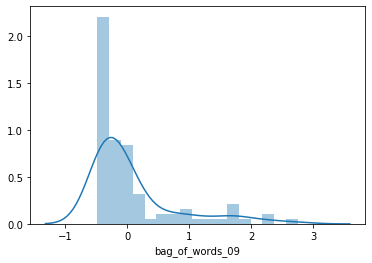

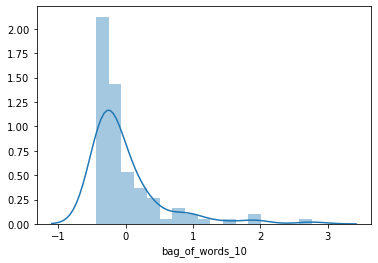

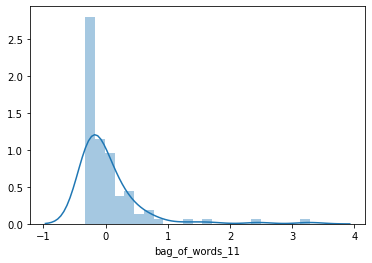

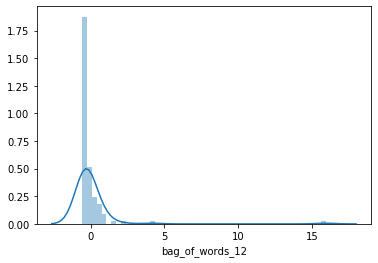

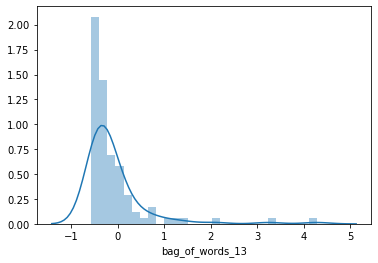

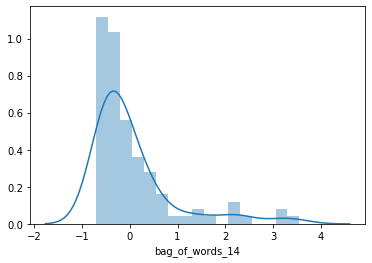

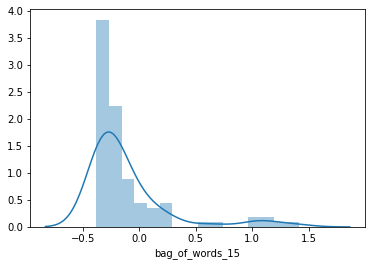

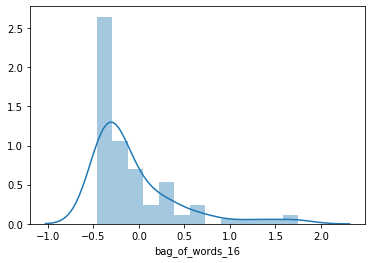

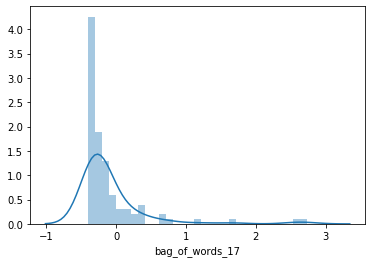

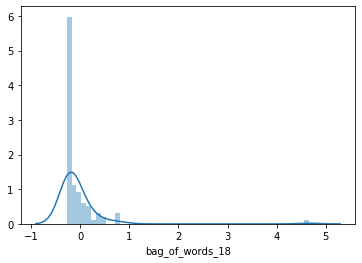

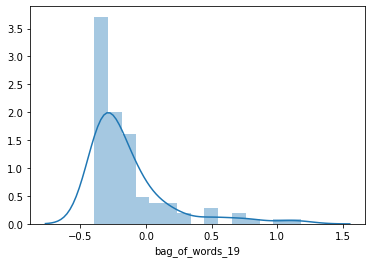

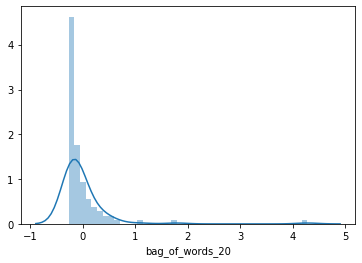

In [257]:
for col in train_cols:
    sns.distplot(train[col].sample(100))
    plt.show()

In [330]:
bins = np.linspace(data_out[aff_col].min(), data_out[aff_col].max(), 6)
labels = [1,2,3,4,5]
#pd.cut(data_out[aff_col], bins=bins, labels=labels).iloc[24]
np.searchsorted(bins, data_out[aff_col].values)[24]
#data_out.loc[1089, aff_col]

0

In [314]:
bins

array([-4.49836833, -1.99112601,  0.51611631,  3.02335863,  5.53060095,
        8.03784327])

In [373]:
#outlier transform
#bff_col = 'bag_of_words_10'
#print(f'\nFor : {bff_col}')
for aff_col in train_cols:
#     if aff_col == bff_col:
#         continue
#     factor = 3
#     upper_lim = train[aff_col].mean () + train[aff_col].std () * factor
#     lower_lim = train[aff_col].mean () - train[aff_col].std () * factor
    
    data_out = train.copy()
#     data_out = data_out[(data_out[aff_col] < upper_lim) & (data_out[aff_col] > lower_lim)]

#     upper_lim = train[bff_col].mean () + train[bff_col].std () * factor
#     lower_lim = train[bff_col].mean () - train[bff_col].std () * factor
    
#     data_out = data_out[(data_out[bff_col] < upper_lim) & (data_out[bff_col] > lower_lim)]
    

    data_out[aff_col] = (data_out[aff_col] - data_out[aff_col].min()+1) .transform(np.log)
    
    scaler = StandardScaler()
    
    x_train = data_out.loc[:, train_cols]
    y_train = data_out['Encoding'].values
    
    x_test = test.loc[:, train_cols]
    y_test = test['Encoding'].values

    y_train = y_train.astype('int')
    y_test = y_test.astype('int')
    

    knn = KNeighborsClassifier(n_neighbors = 10)

    #Train the model using the training sets
    knn.fit(x_train, y_train)

    # Train accuracy
    y_pred = knn.predict(x_train)
    train_acc = accuracy_score(y_pred, y_train)
    train_acc_list.append(train_acc)

    # Test Accuracy
    y_pred = knn.predict(x_test)
    test_acc = accuracy_score(y_pred, y_test)
    test_acc_list.append(test_acc)
    print(f'\nChecking for column : {aff_col}')
    print(f'Training Accuracy : {train_acc}')
    print(f'Test Accuracy : {test_acc}')



Checking for column : red_ch_intensity
Training Accuracy : 0.3734835355285962
Test Accuracy : 0.22666666666666666

Checking for column : green_ch_intensity
Training Accuracy : 0.3778162911611785
Test Accuracy : 0.19666666666666666

Checking for column : blue_ch_intensity
Training Accuracy : 0.36221837088388215
Test Accuracy : 0.22666666666666666

Checking for column : gray_intensity
Training Accuracy : 0.3804159445407279
Test Accuracy : 0.23666666666666666

Checking for column : aspect_ratio
Training Accuracy : 0.37954939341421146
Test Accuracy : 0.23666666666666666

Checking for column : red_ch_std
Training Accuracy : 0.39081455805892545
Test Accuracy : 0.21666666666666667

Checking for column : green_ch_std
Training Accuracy : 0.36915077989601386
Test Accuracy : 0.24

Checking for column : blue_ch_std
Training Accuracy : 0.35528596187175043
Test Accuracy : 0.23

Checking for column : gray_std
Training Accuracy : 0.3804159445407279
Test Accuracy : 0.23666666666666666

Checking for co

## Pre-fitting Data Transformation

In [417]:
#outlier transform
outlier_drop = ['bag_of_words_10', 'blue_ch_skew']
print(f'\nFor : {outlier_drop}')
for aff_col in outlier_drop:
    factor = 3
    upper_lim = train[aff_col].mean () + train[aff_col].std () * factor
    lower_lim = train[aff_col].mean () - train[aff_col].std () * factor
    
    train = train[(train[aff_col] < upper_lim) & (train[aff_col] > lower_lim)]



For : ['bag_of_words_10', 'blue_ch_skew']


## Testing Models

## Baseline model

In [415]:
ones_train = np.ones(len(train))
ones_test = np.ones(len(test))
clf = LogisticRegression(random_state=0, solver='lbfgs',
multi_class='multinomial')
clf.fit(ones_train.reshape(-1, 1), train.Encoding)
baseline_score = clf.score(ones_test.reshape(-1, 1),
test.Encoding)
print ('Baseline score is: %.2f%%'%(100*baseline_score))
pd.crosstab(clf.predict(ones_test.reshape(-1, 1)),
test.Encoding)

Baseline score is: 10.00%


Encoding,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
row_0,,,,,,,,,,,,,,,,,,,,
9,12,12,9,8,12,15,19,10,19,30,14,10,29,16,19,12,11,15,14,14


## Logistic Regression

In [645]:
x_train = train.loc[:, new_train_cols]
y_train = train['Encoding'].values

x_test = test.loc[:, new_train_cols]
y_test = test['Encoding'].values

y_train = y_train.astype('int')
y_test = y_test.astype('int')


#logisticRegr = LogisticRegression(penalty = 'l2', multi_class = 'ovr', solver = 'saga', max_iter = 1000 , C = 10)
logisticRegr = LogisticRegression(penalty = 'l1', multi_class = 'ovr', solver = 'liblinear',max_iter = 300, C = 200)
logisticRegr.fit(x_train, y_train)

# Train accuracy
y_pred = logisticRegr.predict(x_train)
train_acc = accuracy_score(y_pred, y_train)

# Test Accuracy
y_pred = logisticRegr.predict(x_test)
test_acc = accuracy_score(y_pred, y_test)


print(f'Training Accuracy : {train_acc}')
print(f'Test Accuracy : {test_acc}')

scores = cross_validate(logisticRegr, x_train, y_train, cv=3, return_train_score=True)
scores

Training Accuracy : 0.5895087427144047
Test Accuracy : 0.43333333333333335


{'fit_time': array([17.12884283, 27.70328307, 25.24219084]),
 'score_time': array([0.00098586, 0.00089002, 0.00093317]),
 'test_score': array([0.4137931 , 0.41044776, 0.41475827]),
 'train_score': array([0.63899371, 0.6583229 , 0.62747525])}

Checking Performance

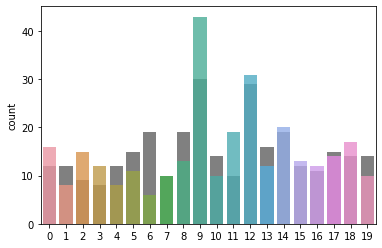

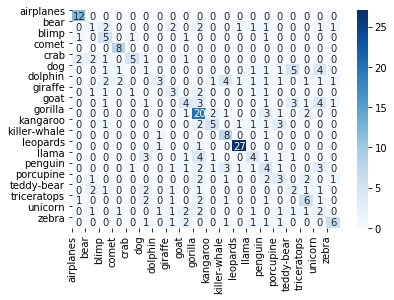

In [506]:
sns.countplot(pd.Series(y_test), color = 'gray')
sns.countplot(pd.Series(y_pred), **{'alpha':0.8})
plt.show()

from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred, labels = test['Encoding'].unique().astype(int))
sns.heatmap(conf, cmap = 'Blues', annot = True)
plt.xticks(test['Encoding'].unique().astype(int), label_list, rotation = 90)
plt.yticks(test['Encoding'].unique().astype(int), label_list)
plt.show()

## K-nearest Neighbors

In [503]:
from sklearn.neighbors import KNeighborsClassifier


x_train = train.loc[:, new_train_cols]
y_train = train['Encoding'].values

x_test = test.loc[:, new_train_cols]
y_test = test['Encoding'].values

y_train = y_train.astype('int')
y_test = y_test.astype('int')

train_acc_list = []
test_acc_list = []

max_n = 100

for n in range(1, max_n):

    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors = n, weights = 'uniform', algorithm = 'kd_tree')

    #Train the model using the training sets
    knn.fit(x_train, y_train)

    # Train accuracy
    y_pred = knn.predict(x_train)
    train_acc = accuracy_score(y_pred, y_train)
    train_acc_list.append(train_acc)

    # Test Accuracy
    y_pred = knn.predict(x_test)
    test_acc = accuracy_score(y_pred, y_test)
    test_acc_list.append(test_acc)

#     print(f'\nTraining Accuracy : {train_acc}')
#     print(f'Test Accuracy : {test_acc}')


Testing performance

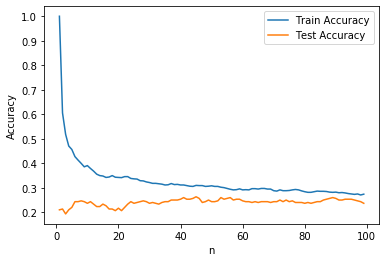

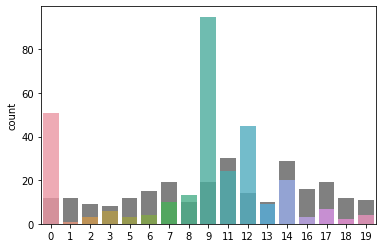

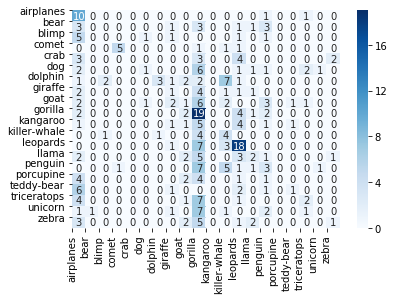

In [504]:
plt.plot(np.arange(1, max_n), train_acc_list, label = 'Train Accuracy')
plt.plot(np.arange(1, max_n), test_acc_list, label = 'Test Accuracy')
plt.xlabel('n')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

sns.countplot(pd.Series(y_test), color = 'gray')
sns.countplot(pd.Series(y_pred), **{'alpha':0.8})
plt.show()

from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred, labels = test['Encoding'].unique().astype(int))
sns.heatmap(conf, cmap = 'Blues', annot = True)
plt.xticks(test['Encoding'].unique().astype(int), label_list, rotation = 90)
plt.yticks(test['Encoding'].unique().astype(int), label_list)
plt.show()

## Classification Tree

Parameter Tuning

In [635]:
x_train = train.loc[:, train_cols]
y_train = train['Encoding'].values

x_test = test.loc[:, train_cols]
y_test = test['Encoding'].values

y_train = y_train.astype('int')
y_test = y_test.astype('int')


# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 32, 32, endpoint=True)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = np.linspace(0.1, 1.0, 10, endpoint=True)
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid

random_grid = {
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

clf = DecisionTreeClassifier()

rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, 
                               n_iter = 300, cv = 4, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)
rf_random.best_params_

Fitting 4 folds for each of 300 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:    2.4s finished
/anaconda3/envs/pred/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'min_samples_split': 0.1, 'min_samples_leaf': 4, 'max_depth': 9}

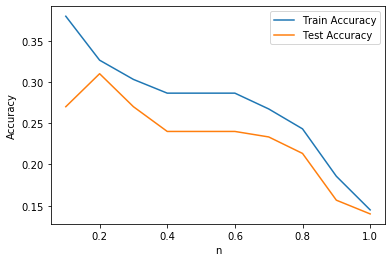

In [597]:
x_train = train.loc[:, train_cols]
y_train = train['Encoding'].values

x_test = test.loc[:, train_cols]
y_test = test['Encoding'].values

y_train = y_train.astype('int')
y_test = y_test.astype('int')

train_acc_list = []
test_acc_list = []

max_depths = np.linspace(1, 32, 32, endpoint=True)
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)


for m in min_samples_splits: 
    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier(min_samples_split = m)

    # Train Decision Tree Classifer
    clf = clf.fit(x_train,y_train)

    # Train accuracy
    y_pred = clf.predict(x_train)
    train_acc = accuracy_score(y_pred, y_train)
    train_acc_list.append(train_acc)
    # Test Accuracy
    y_pred = clf.predict(x_test)
    test_acc = accuracy_score(y_pred, y_test)
    test_acc_list.append(test_acc)
plt.plot(min_samples_splits, train_acc_list, label = 'Train Accuracy')
plt.plot(min_samples_splits, test_acc_list, label = 'Test Accuracy')
plt.xlabel('n')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [665]:
x_train = train.loc[:, train_cols]
y_train = train['Encoding'].values

x_test = test.loc[:, train_cols]
y_test = test['Encoding'].values

y_train = y_train.astype('int')
y_test = y_test.astype('int')


# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 9, min_samples_split = 0.1)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

# Train accuracy
y_pred = clf.predict(x_train)
train_acc = accuracy_score(y_pred, y_train)

# Test Accuracy
y_pred = clf.predict(x_test)
test_acc = accuracy_score(y_pred, y_test)


print(f'Training Accuracy : {train_acc}')
print(f'Test Accuracy : {test_acc}')

scores = cross_validate(clf, x_train, y_train, cv=3, return_train_score=True)
scores

Training Accuracy : 0.3771856786011657
Test Accuracy : 0.26666666666666666


{'fit_time': array([0.01583481, 0.01434803, 0.01256704]),
 'score_time': array([0.00084114, 0.00082588, 0.00075889]),
 'test_score': array([0.32019704, 0.30348259, 0.28753181]),
 'train_score': array([0.40880503, 0.38673342, 0.39727723])}

Visualize tree

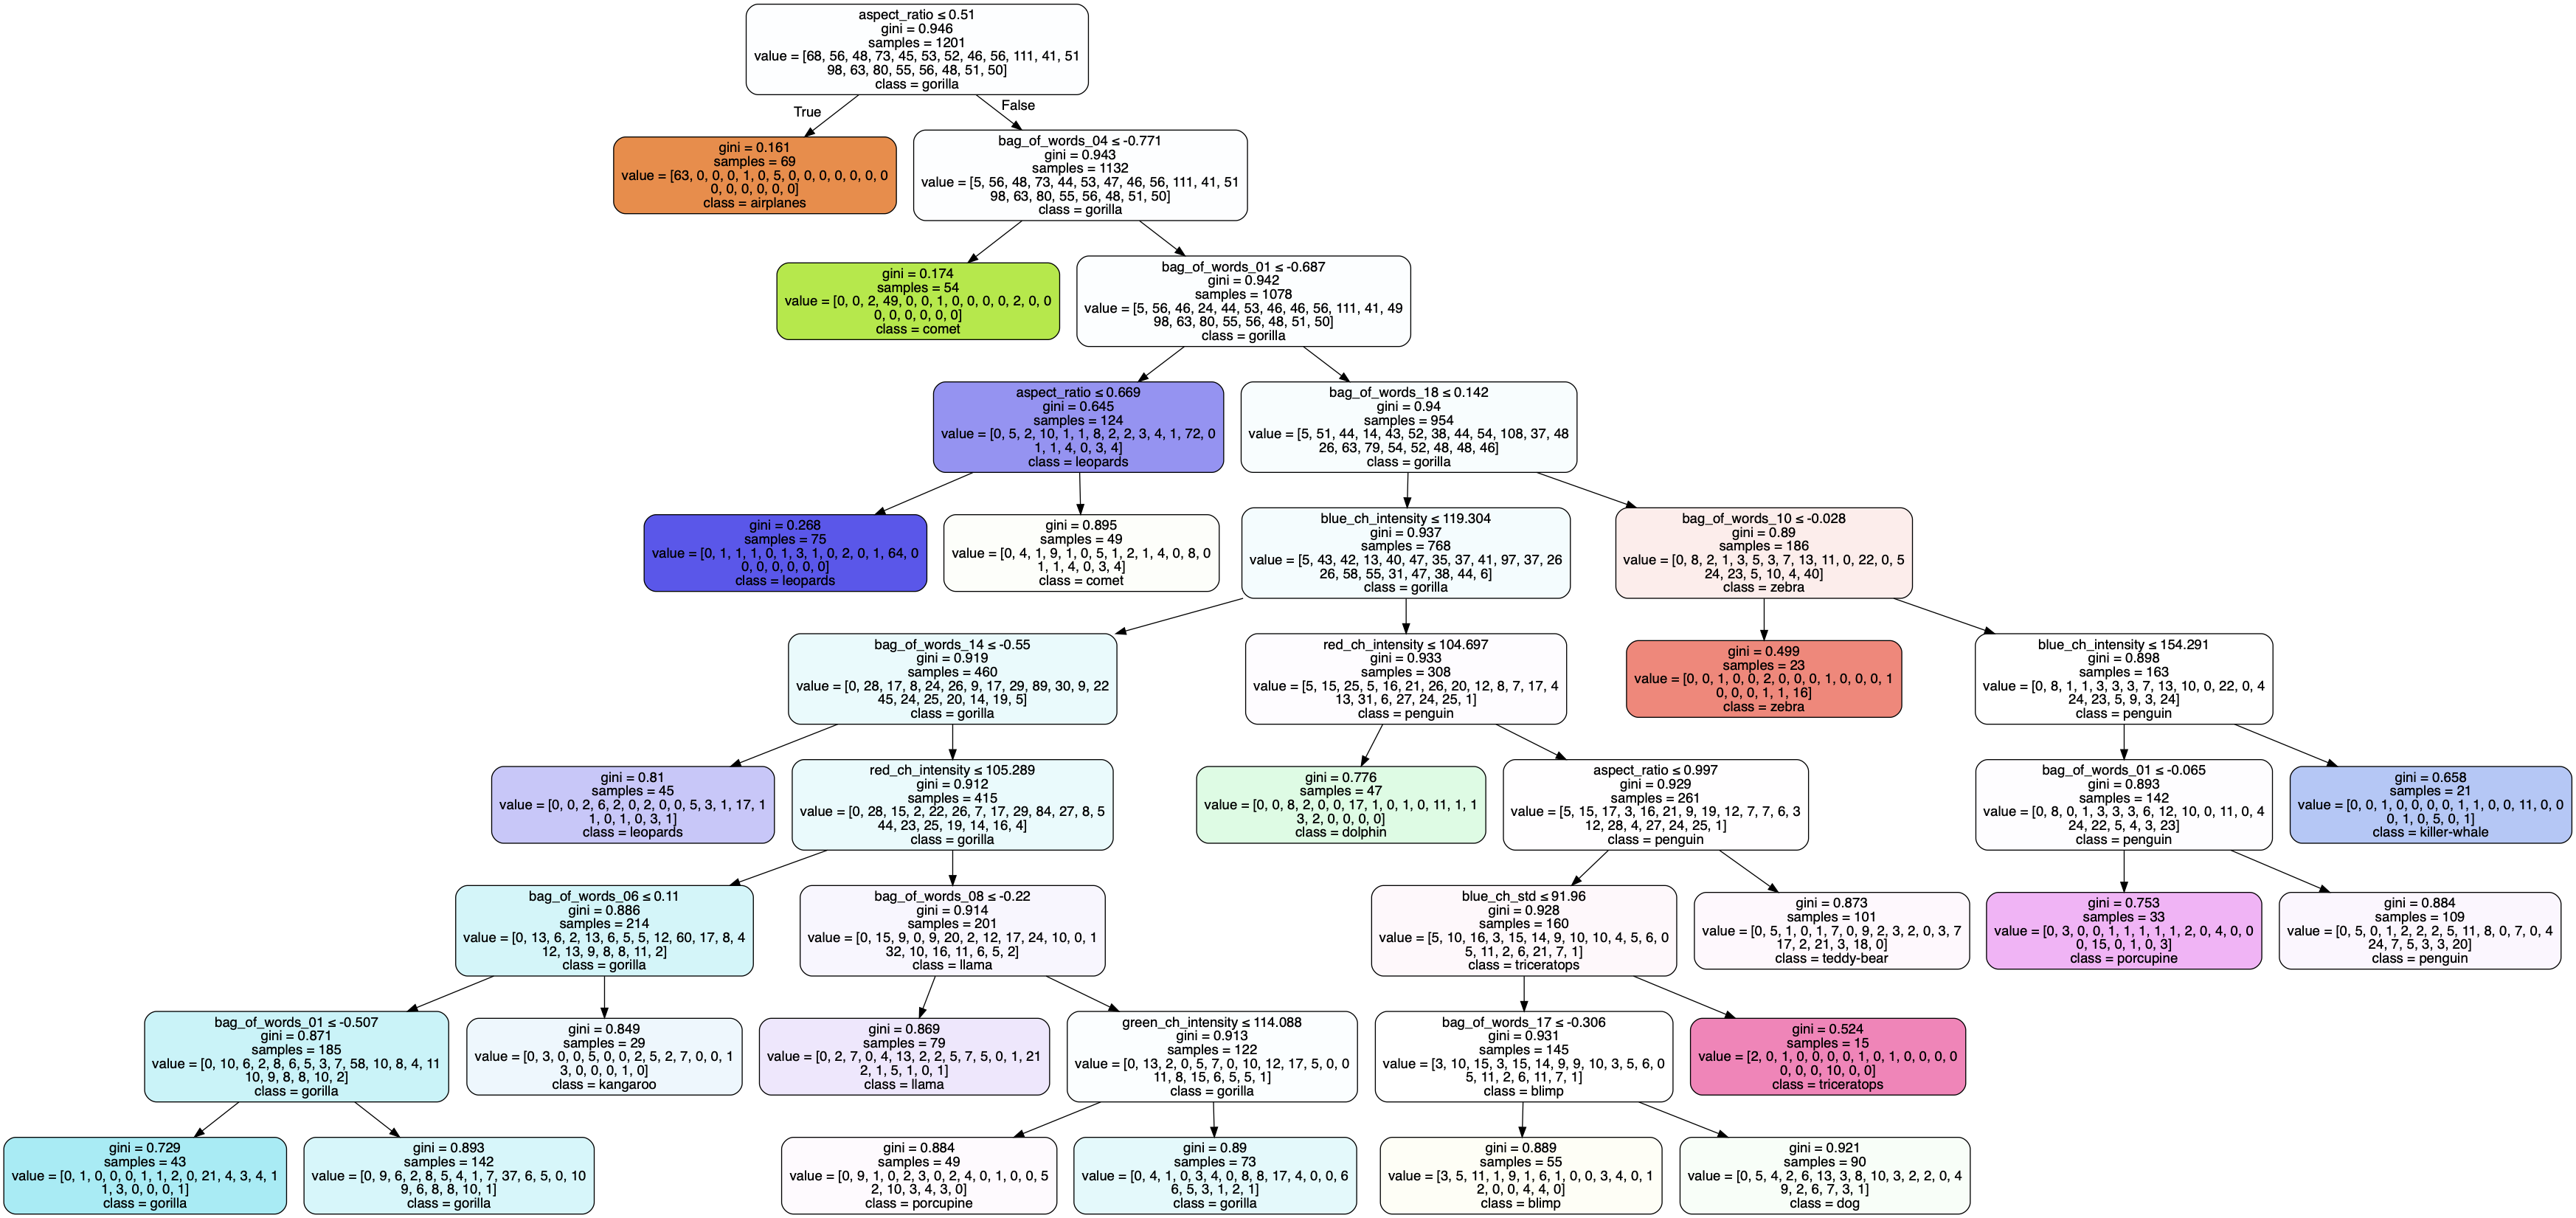

In [654]:

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = train_cols, class_names= label_list)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('single_tree.png')
Image(graph.create_png())

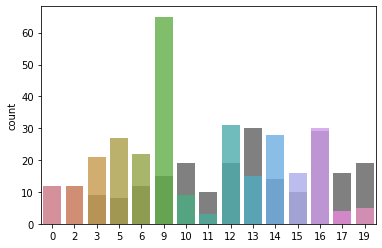

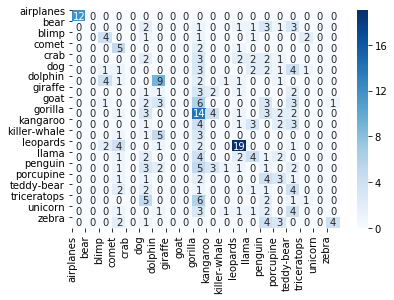

In [655]:
sns.countplot(pd.Series(y_test), color = 'gray')
sns.countplot(pd.Series(y_pred), **{'alpha':0.8})
plt.show()

from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred, labels = test['Encoding'].unique().astype(int))
sns.heatmap(conf, cmap = 'Blues', annot = True)
plt.xticks(test['Encoding'].unique().astype(int), label_list, rotation = 90)
plt.yticks(test['Encoding'].unique().astype(int), label_list)
plt.show()

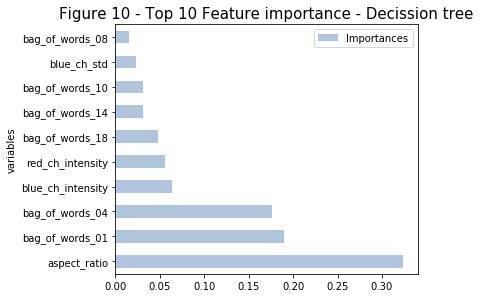

In [667]:
importances = clf.feature_importances_

f_importance = pd.DataFrame({'Importances':clf.feature_importances_,
                   'variables':train_cols}).sort_values(by = 'Importances', ascending= False)

f_importance[:10].plot.barh(x = 'variables', y='Importances', color ='lightsteelblue')#, figsize =(15,5) )
plt.yticks()#(fontsize = 10)
plt.tight_layout()
plt.title('Figure 10 - Top 10 Feature importance - Decission tree', fontsize = 15);

## Random Forest

Parameter Tuning

In [669]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [701]:
x_train = train.loc[:, train_cols]
y_train = train['Encoding'].values

x_test = test.loc[:, train_cols]
y_test = test['Encoding'].values

y_train = y_train.astype('int')
y_test = y_test.astype('int')


criterion = ['gini', 'entropy']
# Number of trees in random forest
n_estimators = [int(x) for x in np.arange(100, 2000, 100)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 32, 32, endpoint=True)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = np.linspace(0.1, 1.0, 10, endpoint=True)
# Minimum number of samples required at each leaf node
min_samples_leaf = np.arange(1, 20)
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion
              }

rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 4, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)
rf_random.best_params_

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  2.7min finished
/anaconda3/envs/pred/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 800,
 'min_samples_split': 0.1,
 'min_samples_leaf': 15,
 'max_features': 'auto',
 'max_depth': 21,
 'criterion': 'gini',
 'bootstrap': False}

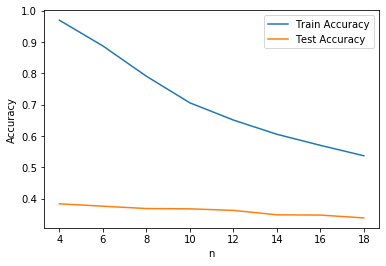

In [728]:
train_acc_list = []
test_acc_list = []

params = np.arange(4, 20, 2)

for m in params: 
    
    rf = RandomForestClassifier(n_estimators = 800, min_samples_leaf = m)
    scores = cross_validate(rf, x_train, y_train, cv=3, return_train_score=True)

    train_acc_list.append(scores['train_score'].mean())
    test_acc_list.append(scores['test_score'].mean())
    
plt.plot(params, train_acc_list, label = 'Train Accuracy')
plt.plot(params, test_acc_list, label = 'Test Accuracy')
plt.xlabel('n')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [718]:
scores['test_score'].mean()

0.39987424214616757

Final Model

In [734]:
x_train = train.loc[:, train_cols]
y_train = train['Encoding'].values

x_test = test.loc[:, train_cols]
y_test = test['Encoding'].values

y_train = y_train.astype('int')
y_test = y_test.astype('int')


# Create Decision Tree classifer object
rf = RandomForestClassifier(n_estimators = 800, max_depth = 19, criterion = 'gini', bootstrap = True)

# Train Decision Tree Classifer
rf = rf.fit(x_train,y_train)

# Train accuracy
y_pred = rf.predict(x_train)
train_acc = accuracy_score(y_pred, y_train)

# Test Accuracy
y_pred = rf.predict(x_test)
test_acc = accuracy_score(y_pred, y_test)


print(f'Training Accuracy : {train_acc}')
print(f'Test Accuracy : {test_acc}')

scores = cross_validate(rf, x_train, y_train, cv=3, return_train_score=True)
scores

Training Accuracy : 1.0
Test Accuracy : 0.4033333333333333


{'fit_time': array([2.36505175, 2.34800529, 2.27071786]),
 'score_time': array([0.08818412, 0.08838677, 0.0946641 ]),
 'test_score': array([0.37931034, 0.39303483, 0.41475827]),
 'train_score': array([1., 1., 1.])}

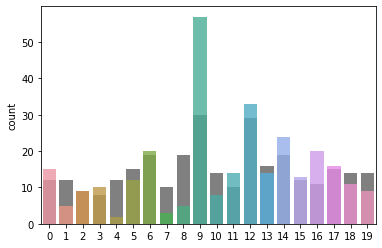

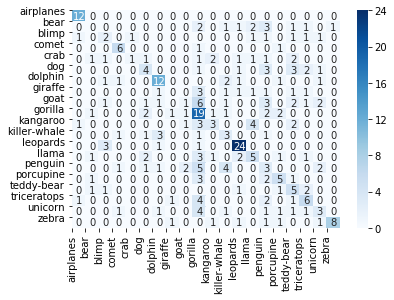

In [731]:
sns.countplot(pd.Series(y_test), color = 'gray')
sns.countplot(pd.Series(y_pred), **{'alpha':0.8})
plt.show()

from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred, labels = test['Encoding'].unique().astype(int))
sns.heatmap(conf, cmap = 'Blues', annot = True)
plt.xticks(test['Encoding'].unique().astype(int), label_list, rotation = 90)
plt.yticks(test['Encoding'].unique().astype(int), label_list)
plt.show()

Support Vector Machine

In [753]:
np.arange(-1, 2.5, 0.5)

array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ])

Done with 0.001
Done with 0.01
Done with 0.1
Done with 1
Best param : 0.001


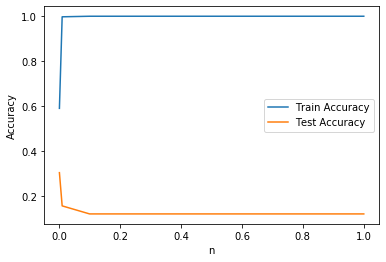

In [784]:
x_train = train.loc[:, new_train_cols]
y_train = train['Encoding'].values

x_test = test.loc[:, new_train_cols]
y_test = test['Encoding'].values

y_train = y_train.astype('int')
y_test = y_test.astype('int')

train_acc_list = []
test_acc_list = []

params = [0.001, 0.01, 0.1, 1]
best_param = params[0]
for m in params: 
    
    model = svm.SVC(gamma =  m)
    scores = cross_validate(model, x_train, y_train, cv=3, return_train_score=True)
    if len(test_acc_list) > 0:
        if scores['test_score'].mean() > min(test_acc_list):
            best_param = m
    train_acc_list.append(scores['train_score'].mean())
    test_acc_list.append(scores['test_score'].mean())
    print(f'Done with {m}')
    
print(f'Best param : {best_param}')
plt.plot(params, train_acc_list, label = 'Train Accuracy')
plt.plot(params, test_acc_list, label = 'Test Accuracy')
plt.xlabel('n')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Final Model

In [776]:
x_train = train.loc[:, new_train_cols]
y_train = train['Encoding'].values

x_test = test.loc[:, new_train_cols]
y_test = test['Encoding'].values

y_train = y_train.astype('int')
y_test = y_test.astype('int')


# Create Decision Tree classifer object
model = svm.SVC(kernel = 'linear', gamma = 'auto')

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

# Train accuracy
y_pred = model.predict(x_train)
train_acc = accuracy_score(y_pred, y_train)

# Test Accuracy
y_pred = model.predict(x_test)
test_acc = accuracy_score(y_pred, y_test)


print(f'Training Accuracy : {train_acc}')
print(f'Test Accuracy : {test_acc}')

scores = cross_validate(model, x_train, y_train, cv=4, return_train_score=True)
scores

Training Accuracy : 0.6119900083263947
Test Accuracy : 0.4033333333333333


{'fit_time': array([12.83950019, 11.50740099, 12.61836219, 12.97088909]),
 'score_time': array([0.01022196, 0.01005173, 0.00993085, 0.00987577]),
 'test_score': array([0.39542484, 0.3807947 , 0.4180602 , 0.41156463]),
 'train_score': array([0.65251397, 0.63848721, 0.65521064, 0.65711136])}